# 프로젝트 개요

## 프로젝트 목표

- 시계열 프로젝트가 아닌 지리 정보인 위도와 경도를 포함하는 데이터를 사용한 데이터 빈도 분석

## 문제 정의
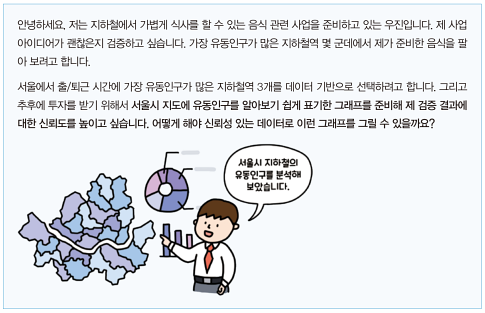

## 지도 라이브러리 Folium

- Folium 공식 소스 Download URL : https://github.com/python-visualization/folium
- Folium 공식 문서의 Quickstart : https://python-visualization.github.io/folium/quickstart.html#Getting-Started


## Colab에 Folium 설치 방법

- Ref.: https://dacon.io/en/codeshare/4200?page&dtype&ptype&fType


In [164]:
# import os, sys
# from google.colab import drive
# drive.mount('/content/drive')

# my_path = '/content/package'
# ## 패키지가 저장될 경로
# save_path = '/content/drive/MyDrive/Colab Notebooks/package' 

# os.symlink(save_path, my_path)
# sys.path.insert(0, my_path)

In [165]:
# !pip install --target=$my_path selenium

In [166]:
import folium

# 데이터 수집

- 서울 열린데이터 광장 홈페이지 : 
  https://data.seoul.go.kr/dataList/OA-12921/F/1/datasetView.do

- 프로젝트에 필요한 데이터
 * 서울시 역 코드로 지하철역 위치 조회 정보
 * 서울교통공사 지하철역명 다국어 표기 정보
 * 서울교통공사 연도별, 일별, 시간대별, 역별 승하차 인원 정보


 - Kaggel 데이터 활용
  * https://www.kaggle.com/datasets/kimjmin/seoul-metro-usage?resource=download

 

In [167]:
import pandas as pd

data = pd.read_csv('seoul-metro-2021.logs.csv')

data

,timestamp,station_code,people_in,people_out
0,2021-01-01T05:00:00.000+09:00,150,86,85
1,2021-01-01T06:00:00.000+09:00,150,111,355
2,2021-01-01T07:00:00.000+09:00,150,157,438
3,2021-01-01T08:00:00.000+09:00,150,306,592
4,2021-01-01T09:00:00.000+09:00,150,333,841
...,...,...,...,...
1941548,2021-12-31T19:00:00.000+09:00,2828,74,263
1941549,2021-12-31T20:00:00.000+09:00,2828,73,145
1941550,2021-12-31T21:00:00.000+09:00,2828,95,209
1941551,2021-12-31T22:00:00.000+09:00,2828,54,138


In [168]:
station_info = pd.read_csv('seoul-metro-station-info.csv')

station_info.head()

,station.code,station.fr_code,line.num,line.name,line.name_sub,line.station_seq,station.name_full,station.name,station.name_chc,station.name_chn,station.name_en,station.name_jp,geo.latitude,geo.longitude,geo.sigungu_code,geo.sigungu_name,geo.addres_road,geo.address_land,geo.phone
0,158,124,1,1호선,지하철1호선,1,청량리(서울시립대입구),청량리|서울시립대입구,祭基洞,祭基洞,Jegidong,チェギドン,37.580178,127.046835,11060,동대문구,서울특별시 동대문구 왕산로 지하205(전농동),서울특별시 동대문구 전농동 620-69 청량리역(1호선),02-6110-1241
1,157,125,1,1호선,지하철1호선,2,제기동,제기동,新設洞,新设洞,Sinseoldong,シンソルトン,37.578103,127.034893,11060,동대문구,서울특별시 동대문구 왕산로 지하93(제기동),서울특별시 동대문구 제기동 65 제기동역(1호선),02-6110-1251
2,156,126,1,1호선,지하철1호선,3,신설동,신설동,東廟앞,东庙,Dongmyo,トンミョアプ,37.575297,127.025087,11060,동대문구,서울특별시 동대문구 왕산로 지하1(신설동),서울특별시 동대문구 신설동 76-5 신설동역(1호선),02-6110-1261
3,159,127,1,1호선,지하철1호선,4,동묘앞,동묘앞,淸凉里(서울市立大入口),清凉里(首尔市立大学),Cheongnyangni(University of Seoul),チョンニャンニ,37.572627,127.016429,11010,종로구,서울특별시 종로구 종로 359(숭인동),서울특별시 종로구 숭인동 117 동묘앞역(1호선),02-6110-1271
4,155,128,1,1호선,지하철1호선,5,동대문,동대문,東大門,东大门,Dongdaemun,トンデムン,37.571420,127.009745,11010,종로구,서울특별시 종로구 종로 지하302(창신동),서울특별시 종로구 창신동 492-1 동대문역(1호선),02-6110-1281


# 데이터 가공

## 승하차 인원 데이터 상세 정보 확인하기


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941553 entries, 0 to 1941552
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   timestamp     object
 1   station_code  int64 
 2   people_in     int64 
 3   people_out    int64 
dtypes: int64(3), object(1)
memory usage: 59.3+ MB


In [170]:
data.head()

,timestamp,station_code,people_in,people_out
0,2021-01-01T05:00:00.000+09:00,150,86,85
1,2021-01-01T06:00:00.000+09:00,150,111,355
2,2021-01-01T07:00:00.000+09:00,150,157,438
3,2021-01-01T08:00:00.000+09:00,150,306,592
4,2021-01-01T09:00:00.000+09:00,150,333,841


## 역기준으로 승하차 인원 합치기
- Method : groupby() 
- Method : sum()

In [171]:
station_sum = data.groupby('station_code').sum()

station_sum

,timestamp,people_in,people_out
station_code,,,
150,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,12697273,12109991
151,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,5997344,6030491
152,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,9638952,9284693
153,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,7704599,7090896
154,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,6651283,6609055
...,...,...,...
2824,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,3206211,3097722
2825,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,1395919,1495603
2826,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,1614590,1475010


## 지하철역 데이터

### 지하철역 데이터 상세 정보 확인

- 역코드 : station.code
- 위도 : geo.latiitude
- 경도 : geo.longitude

In [172]:
station_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station.code       285 non-null    int64  
 1   station.fr_code    285 non-null    object 
 2   line.num           285 non-null    int64  
 3   line.name          285 non-null    object 
 4   line.name_sub      285 non-null    object 
 5   line.station_seq   285 non-null    int64  
 6   station.name_full  285 non-null    object 
 7   station.name       285 non-null    object 
 8   station.name_chc   285 non-null    object 
 9   station.name_chn   285 non-null    object 
 10  station.name_en    285 non-null    object 
 11  station.name_jp    285 non-null    object 
 12  geo.latitude       285 non-null    float64
 13  geo.longitude      285 non-null    float64
 14  geo.sigungu_code   285 non-null    int64  
 15  geo.sigungu_name   285 non-null    object 
 16  geo.addres_road    285 non

In [173]:
station_info = station_info[['station.code', 'geo.latitude', 'geo.longitude']]

station_info

,station.code,geo.latitude,geo.longitude
0,158,37.580178,127.046835
1,157,37.578103,127.034893
2,156,37.575297,127.025087
3,159,37.572627,127.016429
4,155,37.571420,127.009745
...,...,...,...
280,2823,37.451535,127.159816
281,2824,37.445210,127.156866
282,2825,37.440918,127.147564
283,2826,37.437428,127.140722


### 승하차 인원 데이터와 색인 맞추기

In [174]:
# 색인 변경
station_info = station_info.set_index('station.code')

station_info

,geo.latitude,geo.longitude
station.code,,
158,37.580178,127.046835
157,37.578103,127.034893
156,37.575297,127.025087
159,37.572627,127.016429
155,37.571420,127.009745
...,...,...
2823,37.451535,127.159816
2824,37.445210,127.156866
2825,37.440918,127.147564


### 승하차 인원 데이터와 지하철역 데이터 합치기
- 데이터 셋2개를 하나도 합치기
- Method : join()

In [175]:
# 데이터 셋 합치기
joined_data = station_sum.join(station_info)

joined_data

,timestamp,people_in,people_out,geo.latitude,geo.longitude
station_code,,,,,
150,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,12697273,12109991,37.554648,126.972559
151,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,5997344,6030491,37.564718,126.977108
152,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,9638952,9284693,37.570161,126.982923
153,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,7704599,7090896,37.571607,126.991806
154,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,6651283,6609055,37.570926,127.001849
...,...,...,...,...,...
2824,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,3206211,3097722,37.445210,127.156866
2825,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,1395919,1495603,37.440918,127.147564
2826,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,1614590,1475010,37.437428,127.140722


# 데이터 시각화

## 승차인원 시각화
- folium.Map() : 지도 표현
- location() : 지도 위치를 표현하는 위도와 경도 셋팅
- zoom_start() : 어느정도 확대

In [176]:
#승차용 서울 지도 만들기

seoul_in = folium.Map(location=[37.55, 126.98], zoom_start=12)

seoul_in

In [177]:
# 히트맵 플러그인 모듈 탑재
from folium.plugins import HeatMap

# 히트맵 플러그인 지도에 추가하기
HeatMap(data = joined_data[['geo.latitude', 'geo.longitude', 'people_in']]).add_to(seoul_in)

# 지도 확인
seoul_in

## 하차인원 시각화

In [178]:
# 하차용 지도 생성
seoul_out = folium.Map(location=[37.55, 126.98], zoom_start=12)

# 히트맵 플러그인 지도에 추가하기
HeatMap(data = joined_data[['geo.latitude', 'geo.longitude', 'people_out']]).add_to(seoul_out)

# 지도 확인
seoul_out

# 데이터 2차 가공

## 시간을 고려한 데이터 재가공


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941553 entries, 0 to 1941552
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   timestamp     object
 1   station_code  int64 
 2   people_in     int64 
 3   people_out    int64 
dtypes: int64(3), object(1)
memory usage: 59.3+ MB


## 출근 데이터 추출

- data 특정 범위값 추출하기 위해 [ ] 안에 조건식
- 

In [180]:
# 출근용 데이터 추출
morning_data = data[pd.to_datetime(data.timestamp).dt.hour < 9]

morning_data

,timestamp,station_code,people_in,people_out
0,2021-01-01T05:00:00.000+09:00,150,86,85
1,2021-01-01T06:00:00.000+09:00,150,111,355
2,2021-01-01T07:00:00.000+09:00,150,157,438
3,2021-01-01T08:00:00.000+09:00,150,306,592
19,2021-01-01T05:00:00.000+09:00,151,43,40
...,...,...,...,...
1941518,2021-12-31T08:00:00.000+09:00,2827,391,311
1941534,2021-12-31T05:00:00.000+09:00,2828,20,10
1941535,2021-12-31T06:00:00.000+09:00,2828,83,41
1941536,2021-12-31T07:00:00.000+09:00,2828,279,119


## 퇴근 데이터 추출


In [181]:
# 퇴근용 데이터 추출
evening_data = data[pd.to_datetime(data.timestamp).dt.hour > 17]

evening_data

,timestamp,station_code,people_in,people_out
13,2021-01-01T18:00:00.000+09:00,150,658,437
14,2021-01-01T19:00:00.000+09:00,150,579,425
15,2021-01-01T20:00:00.000+09:00,150,479,354
16,2021-01-01T21:00:00.000+09:00,150,510,307
17,2021-01-01T22:00:00.000+09:00,150,445,134
...,...,...,...,...
1941548,2021-12-31T19:00:00.000+09:00,2828,74,263
1941549,2021-12-31T20:00:00.000+09:00,2828,73,145
1941550,2021-12-31T21:00:00.000+09:00,2828,95,209
1941551,2021-12-31T22:00:00.000+09:00,2828,54,138


## 그룹화와 역 정보 합치기

In [182]:
# 역을 기준으로 그룹화하여 데이터 더하기
morning_station_sum = morning_data.groupby('station_code').sum()
evening_station_sum = morning_data.groupby('station_code').sum()

In [183]:
# 역 정보 합치기
morning_joined_data = morning_station_sum.join(station_info)
evening_joined_data = evening_station_sum.join(station_info)

# 시각화

## 출근 시간 승하차 인원 시각화

In [184]:
# 출근 시간 승차 인원
morning_seoul_in = folium.Map(location=[37.55, 126.98], zoom_start=12)
HeatMap(data = morning_joined_data[['geo.latitude', 'geo.longitude', 'people_in']]).add_to(morning_seoul_in)
morning_seoul_in

In [185]:
# 출근 시간 하차 인원
morning_seoul_out = folium.Map(location=[37.55, 126.98], zoom_start=12)
HeatMap(data = morning_joined_data[['geo.latitude', 'geo.longitude', 'people_in']]).add_to(morning_seoul_out)
morning_seoul_out

## 퇴근시간 승하차 인원 시각화

In [186]:
# 퇴근 시간 승차 인원
evening_seoul_in = folium.Map(location=[37.55, 126.98], zoom_start=12)
HeatMap(data = morning_joined_data[['geo.latitude', 'geo.longitude', 'people_in']]).add_to(evening_seoul_in)
evening_seoul_in

In [187]:
# 퇴근 시간 하차 인원
evening_seoul_out = folium.Map(location=[37.55, 126.98], zoom_start=12)
HeatMap(data = morning_joined_data[['geo.latitude', 'geo.longitude', 'people_in']]).add_to(evening_seoul_out)
evening_seoul_out

# 과제

1. 점심시간 지하철 승하차 현황 분석
- 11시부터 2시 사이 강북과 강남 지역에서 승차인원/하차인원이 가장 많은 역 각각 3개

In [188]:
lunch_data = data[(pd.to_datetime(data.timestamp).dt.hour >= 11) & (pd.to_datetime(data.timestamp).dt.hour <= 14)]
lunch_data


,timestamp,station_code,people_in,people_out
6,2021-01-01T11:00:00.000+09:00,150,579,625
7,2021-01-01T12:00:00.000+09:00,150,737,838
8,2021-01-01T13:00:00.000+09:00,150,696,788
9,2021-01-01T14:00:00.000+09:00,150,674,791
25,2021-01-01T11:00:00.000+09:00,151,117,208
...,...,...,...,...
1941524,2021-12-31T14:00:00.000+09:00,2827,325,186
1941540,2021-12-31T11:00:00.000+09:00,2828,240,112
1941541,2021-12-31T12:00:00.000+09:00,2828,192,124
1941542,2021-12-31T13:00:00.000+09:00,2828,189,159


In [189]:
lunch_station_sum=lunch_data.groupby('station_code').sum()
lunch_joined_data=lunch_station_sum.join(station_info)
lunch_joined_data

,timestamp,people_in,people_out,geo.latitude,geo.longitude
station_code,,,,,
150,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,2505050,2386392,37.554648,126.972559
151,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,824481,1122552,37.564718,126.977108
152,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,1414527,1829519,37.570161,126.982923
153,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,1848245,2472974,37.571607,126.991806
154,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,1652295,2041594,37.570926,127.001849
...,...,...,...,...,...
2824,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,604018,448206,37.445210,127.156866
2825,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,298017,277076,37.440918,127.147564
2826,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,339413,271084,37.437428,127.140722


In [190]:
lunch_in_data=lunch_joined_data.sort_values(by='people_in', ascending=False)
lunch_in_data

,timestamp,people_in,people_out,geo.latitude,geo.longitude
station_code,,,,,
222,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,3967332,5009410,37.497175,127.027926
216,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,3611907,4105618,37.513950,127.102234
230,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,3521209,2566676,37.484201,126.929715
329,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,3004987,3703051,37.504810,127.004943
228,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,2732422,2340282,37.481247,126.952739
...,...,...,...,...,...
434,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,85935,59223,37.463873,126.989134
2828,2021-12-14T11:00:00.000+09:002021-12-14T12:00:...,9598,7953,37.463170,127.139526
321,2021-01-02T11:00:00.000+09:002021-01-02T12:00:...,0,0,37.561243,126.994280


In [191]:
lunch_out_data=lunch_joined_data.sort_values(by='people_out', ascending=False)
lunch_out_data

,timestamp,people_in,people_out,geo.latitude,geo.longitude
station_code,,,,,
222,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,3967332,5009410,37.497175,127.027926
239,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,2427533,4667215,37.557192,126.925381
216,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,3611907,4105618,37.513950,127.102234
329,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,3004987,3703051,37.504810,127.004943
219,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,2036127,2846899,37.508844,127.063160
...,...,...,...,...,...
434,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,85935,59223,37.463873,126.989134
2828,2021-12-14T11:00:00.000+09:002021-12-14T12:00:...,9598,7953,37.463170,127.139526
2615,2021-01-02T11:00:00.000+09:002021-01-02T12:00:...,0,0,37.619001,126.921008


In [192]:
lunch_seoul_in = folium.Map(location=[37.55, 126.98], zoom_start=12)
HeatMap(data = lunch_joined_data[['geo.latitude', 'geo.longitude', 'people_in']]).add_to(lunch_seoul_in)
lunch_seoul_in

In [193]:
lunch_seoul_out = folium.Map(location=[37.55, 126.98], zoom_start=12)
HeatMap(data = lunch_joined_data[['geo.latitude', 'geo.longitude', 'people_out']]).add_to(lunch_seoul_out)
lunch_seoul_out

Result: 승차인원이 가장 많은 역 번호는 222, 216, 230이고, 하차인원이 가장 많은 역 번호는 222, 239, 216이다.

2. 1번에서 가공한 데이터를 통해 히트맵 대신 원하는 역에 동그라미 그려보기
- 점심시간에 하차인원 250만명 이상인 역만 표기
- 동그라미 테두리는 붉은색, 내부는 붉은색 음영
- 동그라미 반지름은 하차인원의 0.01%

In [194]:
lunch_out_data=lunch_joined_data.sort_values(by='people_out', ascending=False)
lunch_out_data_over250 = lunch_out_data[lunch_out_data['people_out'] >= 2500000]
lunch_out_data_over250

,timestamp,people_in,people_out,geo.latitude,geo.longitude
station_code,,,,,
222,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,3967332,5009410,37.497175,127.027926
239,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,2427533,4667215,37.557192,126.925381
216,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,3611907,4105618,37.513950,127.102234
329,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,3004987,3703051,37.504810,127.004943
219,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,2036127,2846899,37.508844,127.063160
234,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,2719979,2657333,37.508725,126.891295
420,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,1659526,2651127,37.582336,127.001844
220,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,2442474,2578990,37.504503,127.049008
230,2021-01-01T11:00:00.000+09:002021-01-01T12:00:...,3521209,2566676,37.484201,126.929715


In [195]:
lunch_out_data_over250=lunch_out_data_over250[['people_out', 'geo.latitude', 'geo.longitude']]
lunch_out_data_over250

,people_out,geo.latitude,geo.longitude
station_code,,,
222,5009410,37.497175,127.027926
239,4667215,37.557192,126.925381
216,4105618,37.513950,127.102234
329,3703051,37.504810,127.004943
219,2846899,37.508844,127.063160
234,2657333,37.508725,126.891295
420,2651127,37.582336,127.001844
220,2578990,37.504503,127.049008
230,2566676,37.484201,126.929715


In [196]:
rad = lunch_out_data_over250['people_out']
print(rad)

station_code
222    5009410
239    4667215
216    4105618
329    3703051
219    2846899
234    2657333
420    2651127
220    2578990
230    2566676
221    2501529
Name: people_out, dtype: int64


In [197]:
for i in lunch_out_data_over250.index:
    folium.Circle(
        location= lunch_out_data_over250.loc[i, ['geo.latitude','geo.longitude']],
        radius=rad[i]*0.01*0.01,
        color='red',
        fill_color='red',
    ).add_to(lunch_seoul_out)
lunch_seoul_out